In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
credit_data_path = "Data/CreditCardData.csv"


# Read the credit data
credit_metadata = pd.read_csv(credit_data_path)
credit_df=pd.DataFrame(credit_metadata)



# Display the data table for preview
credit_df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [7]:
credit_df.columns

Index(['Transaction ID', 'Date', 'Day of Week', 'Time', 'Type of Card',
       'Entry Mode', 'Amount', 'Type of Transaction', 'Merchant Group',
       'Country of Transaction', 'Shipping Address', 'Country of Residence',
       'Gender', 'Age', 'Bank', 'Fraud'],
      dtype='object')

## Summary Statistics

In [3]:
credit_nonfraud_df=credit_df.loc[credit_df["Fraud"] == 0]

In [4]:
credit_nonfraud_df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
5,#3446 698,13-Oct-20,Tuesday,20,MasterCard,Tap,£30,POS,Children,India,India,India,M,48.4,Monzo,0


In [13]:
credit_nonfraud_df['Amount'] = credit_nonfraud_df['Amount'].str.replace('£', '')
credit_nonfraud_df['Amount']= credit_nonfraud_df['Amount'].astype(float)

mean=credit_nonfraud_df.groupby(['Merchant Group'])['Amount'].mean()
median=credit_nonfraud_df.groupby(['Merchant Group'])['Amount'].median()
variance=credit_nonfraud_df.groupby(['Merchant Group'])['Amount'].var()
std_dev=credit_nonfraud_df.groupby(['Merchant Group'])['Amount'].std()
sem=credit_nonfraud_df.groupby(['Merchant Group'])['Amount'].sem()

stats_nonfraud_df=pd.DataFrame({
    "Mean Amount":mean,
    "Median Amount":median,
    "Amount Variance":variance,
    "Amount Std. Dev.":std_dev,
    "Amount Std. Err.":sem
})

stats_nonfraud_df

C:\Users\nehas\AppData\Local\Temp\ipykernel_8552\1665573198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_nonfraud_df['Amount'] = credit_nonfraud_df['Amount'].str.replace('£', '')
C:\Users\nehas\AppData\Local\Temp\ipykernel_8552\1665573198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_nonfraud_df['Amount']= credit_nonfraud_df['Amount'].astype(float)


,Mean Amount,Median Amount,Amount Variance,Amount Std. Dev.,Amount Std. Err.
Merchant Group,,,,,
Children,115.466539,30.0,15219.048013,123.365506,1.272486
Electronics,116.172240,32.0,15365.187602,123.956394,1.326515
Entertainment,117.994918,36.0,15570.359728,124.781247,1.297484
Fashion,117.701092,34.0,15619.767519,124.979068,1.312808
Food,116.584205,31.0,15443.693518,124.272658,1.290801
Gaming,114.284684,30.0,15035.602621,122.619748,1.262847
Products,116.552609,32.0,15316.786774,123.761007,1.285001
Restaurant,114.142602,30.0,15184.280417,123.224512,1.261802
Services,115.472461,30.0,15459.308916,124.335469,1.280856


In [8]:
credit_fraud_df=credit_df.loc[credit_df["Fraud"] == 1]

In [9]:
credit_fraud_df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
11,#3474 192,14-Oct-20,Wednesday,1,MasterCard,PIN,£106,POS,Fashion,Russia,Russia,United Kingdom,F,48.7,Metro,1
16,#3513 029,13-Oct-20,Tuesday,0,MasterCard,CVC,£25,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
37,#3316 175,14-Oct-20,Wednesday,3,MasterCard,PIN,£5,ATM,Services,China,China,United Kingdom,F,62.8,Barlcays,1
42,#2617 497,14-Oct-20,Wednesday,4,Visa,PIN,£206,POS,Children,United Kingdom,India,United Kingdom,M,46.3,Barclays,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,#3602 464,14-Oct-20,Wednesday,1,MasterCard,PIN,£30,ATM,Fashion,China,China,United Kingdom,M,33.9,Barclays,1
99954,#3257 939,13-Oct-20,Tuesday,12,MasterCard,CVC,£386,Online,Products,China,China,United Kingdom,M,56.4,Barclays,1
99969,#3249 369,13-Oct-20,Tuesday,18,Visa,PIN,£21,ATM,Subscription,United Kingdom,USA,United Kingdom,M,50.1,Barclays,1
99974,#2596 607,13-Oct-20,Tuesday,9,MasterCard,CVC,£211,Online,Subscription,China,China,United Kingdom,F,44.2,Barclays,1


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


credit_fraud_df['Amount'] = credit_fraud_df['Amount'].str.replace('£', '')
credit_fraud_df['Amount']= credit_fraud_df['Amount'].astype(float)

mean=credit_fraud_df.groupby(['Merchant Group'])['Amount'].mean()
median=credit_fraud_df.groupby(['Merchant Group'])['Amount'].median()
variance=credit_fraud_df.groupby(['Merchant Group'])['Amount'].var()
std_dev=credit_fraud_df.groupby(['Merchant Group'])['Amount'].std()
sem=credit_fraud_df.groupby(['Merchant Group'])['Amount'].sem()

stats_df=pd.DataFrame({
    "Mean Amount":mean,
    "Median Amount":median,
    "Amount Variance":variance,
    "Amount Std. Dev.":std_dev,
    "Amount Std. Err.":sem
})

stats_df

C:\Users\nehas\AppData\Local\Temp\ipykernel_8552\1612073503.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_fraud_df['Amount'] = credit_fraud_df['Amount'].str.replace('£', '')
C:\Users\nehas\AppData\Local\Temp\ipykernel_8552\1612073503.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_fraud_df['Amount']= credit_fraud_df['Amount'].astype(float)


,Mean Amount,Median Amount,Amount Variance,Amount Std. Dev.,Amount Std. Err.
Merchant Group,,,,,
Children,79.455043,23.0,12609.683228,112.292846,3.139907
Electronics,89.382114,24.0,14817.994227,121.729184,3.880585
Entertainment,54.430508,21.0,8942.160698,94.562999,3.893097
Fashion,58.849567,20.0,9876.110607,99.378622,3.269317
Food,46.173010,20.0,6964.108664,83.451235,3.471114
Gaming,61.929674,20.0,11004.739032,104.903475,4.344658
Products,58.973357,20.0,10396.025979,101.960904,4.297140
Restaurant,52.335807,20.0,8456.810816,91.960920,3.961037
Services,52.547297,19.0,9040.410619,95.081074,3.907808


## Bar and Pie Charts

In [10]:
vc=credit_fraud_df['Country of Transaction'].value_counts()
vc

India             1577
USA               1559
China             1510
Russia            1481
United Kingdom    1068
Name: Country of Transaction, dtype: int64

<Axes: ylabel='# of Fraud Txns'>

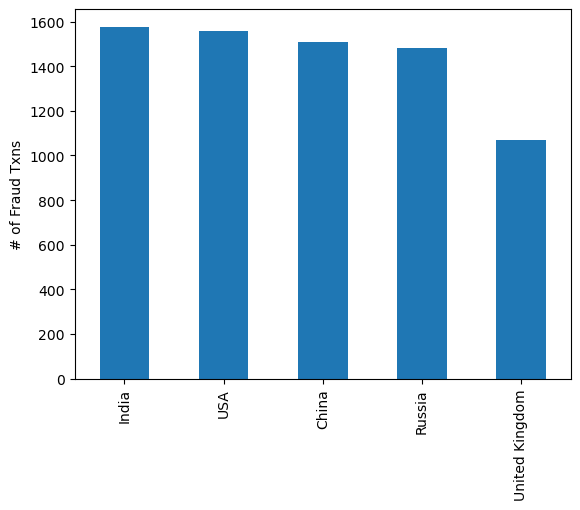

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
vc.plot(kind="bar", ylabel='# of Fraud Txns')

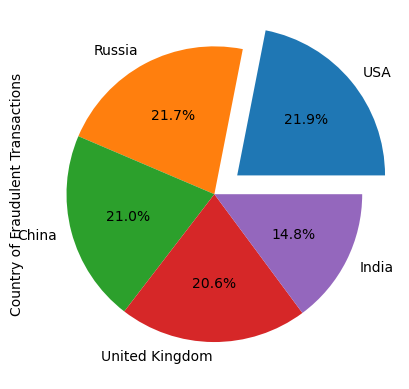

In [13]:

country_transaction=credit_fraud_df['Country of Transaction'].unique()

country_transaction_count=credit_fraud_df['Country of Transaction'].value_counts()
myexplode = [0.2, 0, 0,0,0]

plt.pie(country_transaction_count,labels=country_transaction,
        autopct="%1.1f%%", explode=myexplode)
plt.ylabel("Country of Fraudulent Transactions")
plt.savefig("piechart_fraud_country.jpg")

<Axes: ylabel='Type of Card'>

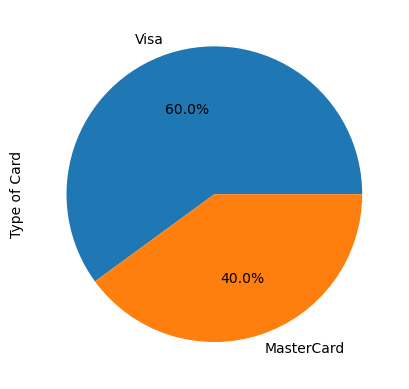

In [14]:
credit_fraud_df['Type of Card'].value_counts().plot(kind='pie', y='Card Type',autopct='%1.1f%%')

<Axes: ylabel='Gender'>

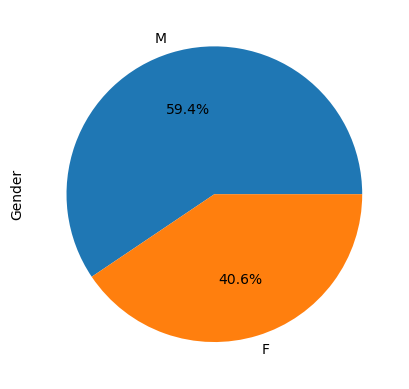

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
credit_fraud_df['Gender'].value_counts().plot(kind='pie', y='Gender',autopct='%1.1f%%')


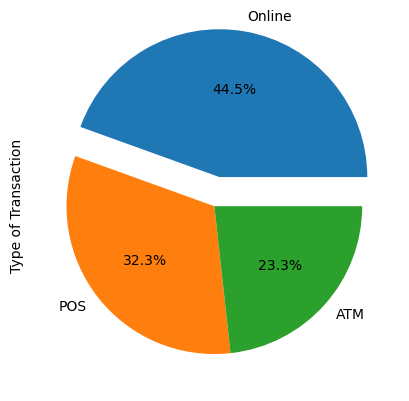

In [16]:
#credit_df['Type of Transaction'].value_counts().plot(kind='pie', y='Type of Transaction', autopct='%1.1f%%')


type_transaction=credit_fraud_df['Type of Transaction'].unique()

type_transaction_count=credit_fraud_df['Type of Transaction'].value_counts()
myexplode = [0.2, 0, 0]

plt.pie(type_transaction_count,labels=type_transaction,
        autopct="%1.1f%%", explode=myexplode)
plt.ylabel("Type of Transaction")
plt.savefig("piechart.jpg")

In [17]:
#min_age=credit_df['Age'].max()

age_bins = [15, 30, 50, 65, 90]
labels = ["<30", "30-50", "50-65", "65-90"]

credit_fraud_df["Age Range"] = pd.cut(x=credit_fraud_df['Age'],  bins=age_bins,labels=labels)
credit_fraud_df

C:\Users\nehas\AppData\Local\Temp\ipykernel_16576\2086517012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_fraud_df["Age Range"] = pd.cut(x=credit_fraud_df['Age'],  bins=age_bins,labels=labels)


,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,Age Range
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,30-50
11,#3474 192,14-Oct-20,Wednesday,1,MasterCard,PIN,106.0,POS,Fashion,Russia,Russia,United Kingdom,F,48.7,Metro,1,30-50
16,#3513 029,13-Oct-20,Tuesday,0,MasterCard,CVC,25.0,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1,50-65
37,#3316 175,14-Oct-20,Wednesday,3,MasterCard,PIN,5.0,ATM,Services,China,China,United Kingdom,F,62.8,Barlcays,1,50-65
42,#2617 497,14-Oct-20,Wednesday,4,Visa,PIN,206.0,POS,Children,United Kingdom,India,United Kingdom,M,46.3,Barclays,1,30-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,#3602 464,14-Oct-20,Wednesday,1,MasterCard,PIN,30.0,ATM,Fashion,China,China,United Kingdom,M,33.9,Barclays,1,30-50
99954,#3257 939,13-Oct-20,Tuesday,12,MasterCard,CVC,386.0,Online,Products,China,China,United Kingdom,M,56.4,Barclays,1,50-65
99969,#3249 369,13-Oct-20,Tuesday,18,Visa,PIN,21.0,ATM,Subscription,United Kingdom,USA,United Kingdom,M,50.1,Barclays,1,50-65
99974,#2596 607,13-Oct-20,Tuesday,9,MasterCard,CVC,211.0,Online,Subscription,China,China,United Kingdom,F,44.2,Barclays,1,30-50


<Axes: xlabel='Age group', ylabel='# of Fraud Txns'>

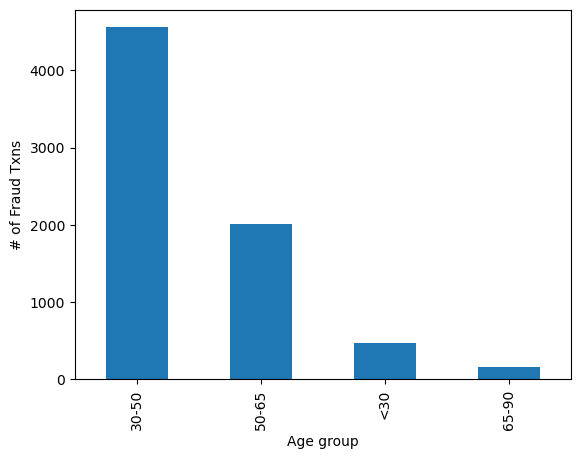

In [18]:
vc=credit_fraud_df['Age Range'].value_counts()
vc.plot(kind="bar",xlabel='Age group' , ylabel='# of Fraud Txns')

30-50    4555
50-65    2008
<30       476
65-90     156
Name: Age Range, dtype: int64


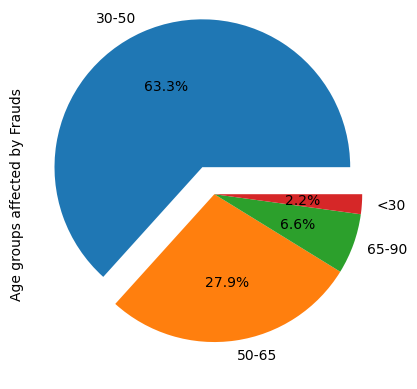

In [21]:
age_group=credit_fraud_df['Age Range'].unique()

age_group_count=credit_fraud_df['Age Range'].value_counts()
print(age_group_count)
myexplode = [0.2, 0, 0, 0]

plt.pie(age_group_count,labels=age_group,
        autopct="%1.1f%%", explode=myexplode)
plt.ylabel("Age groups affected by Frauds")
plt.savefig("piechart_age.jpg")

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_df=clean_study_data_complete.loc[(clean_study_data_complete["Drug Regimen"] == "Capomulin")|
                                     (clean_study_data_complete["Drug Regimen"] == "Ramicane")|
                                     (clean_study_data_complete["Drug Regimen"] == "Infubinol")|
                                     (clean_study_data_complete["Drug Regimen"] == "Ceftamin")
                                       ,:]

treatment_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = treatment_df.groupby(['Mouse ID'])['Timepoint'].max()
timepoint_df_reset_ind=timepoint_df.reset_index()
timepoint_df_reset_ind.head()
print(timepoint_df_reset_ind)


    


   Mouse ID  Timepoint
0      a203         45
1      a251         45
2      a275         45
3      a411         45
4      a444         45
..      ...        ...
95     y769         45
96     y793         45
97     y865         45
98     z578         45
99     z581         45

[100 rows x 2 columns]


In [23]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(timepoint_df_reset_ind,treatment_df, on=["Mouse ID","Timepoint"], how="left")
tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [26]:
credit_df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list==['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#credit_df['Amount'] = credit_df['Amount'].str.replace('£', '')
#credit_df['Amount']= credit_df['Amount'].astype(float)


trans_type=credit_fraud_df['Type of Transaction'].unique()

# Create empty list to fill with amount data (for plotting)
amount_list=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outlier=[]

    # Locate the rows which contain diff Type of Transaction and get the Amounts
for m in trans_type:
     # add subset 
    amount_data=credit_fraud_df.loc[credit_fraud_df["Type of Transaction"] == m,'Amount']
    amount_list.append(amount_data)
    quartiles = amount_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr_t = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr_t)
    upper_bound = upperq + (1.5*iqr_t)
#     print(f"lower bound = {lower_bound} for {m} ")
#     print(f"upper bound = {upper_bound} for {m} ")
    # Determine outliers using upper and lower bounds
    
    outlier=amount_data.loc[(amount_data < lower_bound) | (amount_data > upper_bound)]
    if len(outlier)>0:
        print (f"outliers present for {m}")
        print(f"Values for {m} that are outliers are  {outlier}")
    else:
        print(f"No outliers for {m}")
    

outliers present for Online
Values for Online that are outliers are  4         91.0
666      327.0
681      122.0
831      341.0
917      251.0
         ...  
99762    269.0
99802    129.0
99859    343.0
99954    386.0
99974    211.0
Name: Amount, Length: 734, dtype: float64
outliers present for POS
Values for POS that are outliers are  11       106.0
42       206.0
108      189.0
398      322.0
449      239.0
         ...  
99137    356.0
99679     62.0
99761     94.0
99791    377.0
99943    236.0
Name: Amount, Length: 422, dtype: float64
outliers present for ATM
Values for ATM that are outliers are  902       60.0
1411     373.0
1837     383.0
1945     360.0
2433     368.0
         ...  
98694    238.0
99156    288.0
99186    391.0
99532    224.0
99730    370.0
Name: Amount, Length: 283, dtype: float64


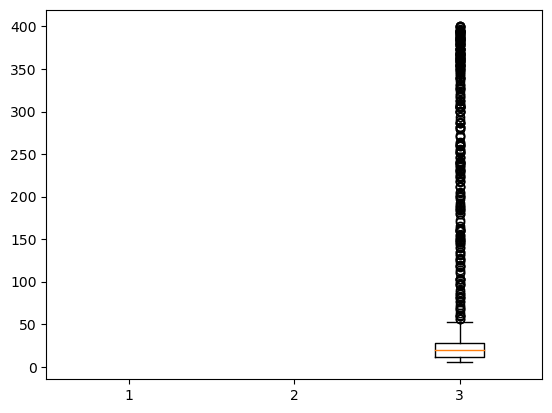

In [23]:
# Generate a box plot that shows the distrubution of the amount for each Type of Transaction
fig1, ax = plt.subplots()
ax.boxplot(amount_list)
plt.savefig("boxplot.jpg")
plt.show()

## Line and Scatter Plots

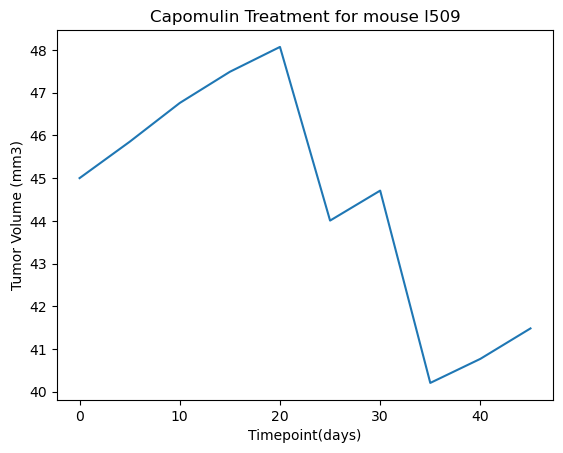

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df=clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"
                                       ,:]

single_mouse_df=Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'])
         
         
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for mouse l509" )
plt.savefig("lineplot.jpg")

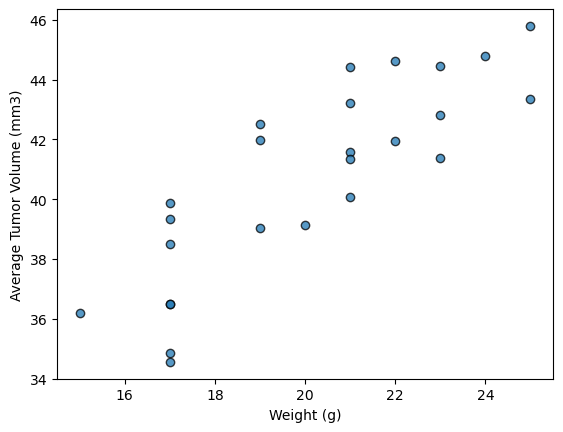

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_regimen=clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"
                                       ,:].groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)' ]].mean()

plt.scatter(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumor Volume (mm3)'],marker="o",edgecolors="black",alpha=0.75 )

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("scatterplot.jpg")

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


y = 0.95x + 21.55


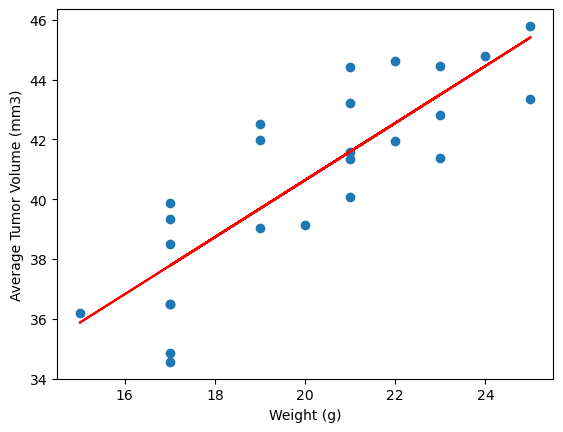

In [38]:
# a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_regimen['Weight (g)'], Capomulin_regimen['Tumor Volume (mm3)'])

regress_values = Capomulin_regimen['Weight (g)'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print( line_eq )
plt.scatter(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumor Volume (mm3)'])


plt.plot(Capomulin_regimen['Weight (g)'],regress_values,"r-")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("regressionplot.jpg")

In [30]:
Capomulin_regimen_reg=Capomulin_regimen.assign(RegTumorVol=regress_values)

In [31]:
Capomulin_regimen_reg.head()

,Weight (g),Tumor Volume (mm3),RegTumorVol
Mouse ID,,,
b128,22.0,41.963636,42.549834
b742,21.0,40.083699,41.595394
f966,17.0,36.505973,37.777635
g288,19.0,41.990097,39.686515
g316,22.0,44.613344,42.549834
